<a href="https://www.kaggle.com/code/robi5bd/data-visualization-with-python-plotnine-altair?scriptVersionId=164044212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install plotnine pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import Plotnine basic elements
import pandas as pd
from plotnine import *

In [4]:
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load mpg dataset
from plotnine.data import mpg
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
# Load the diamonds dataset
from plotnine.data import diamonds
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# BAR Chart

In [7]:
#BAR Chart with Altair Library
(
    alt.Chart(
        mpg, title='Number of Cars by Make'
    )
    .mark_bar()
    .encode(
        x='count()', y=alt.Y('manufacturer')
    )
)

alt.Chart(...)

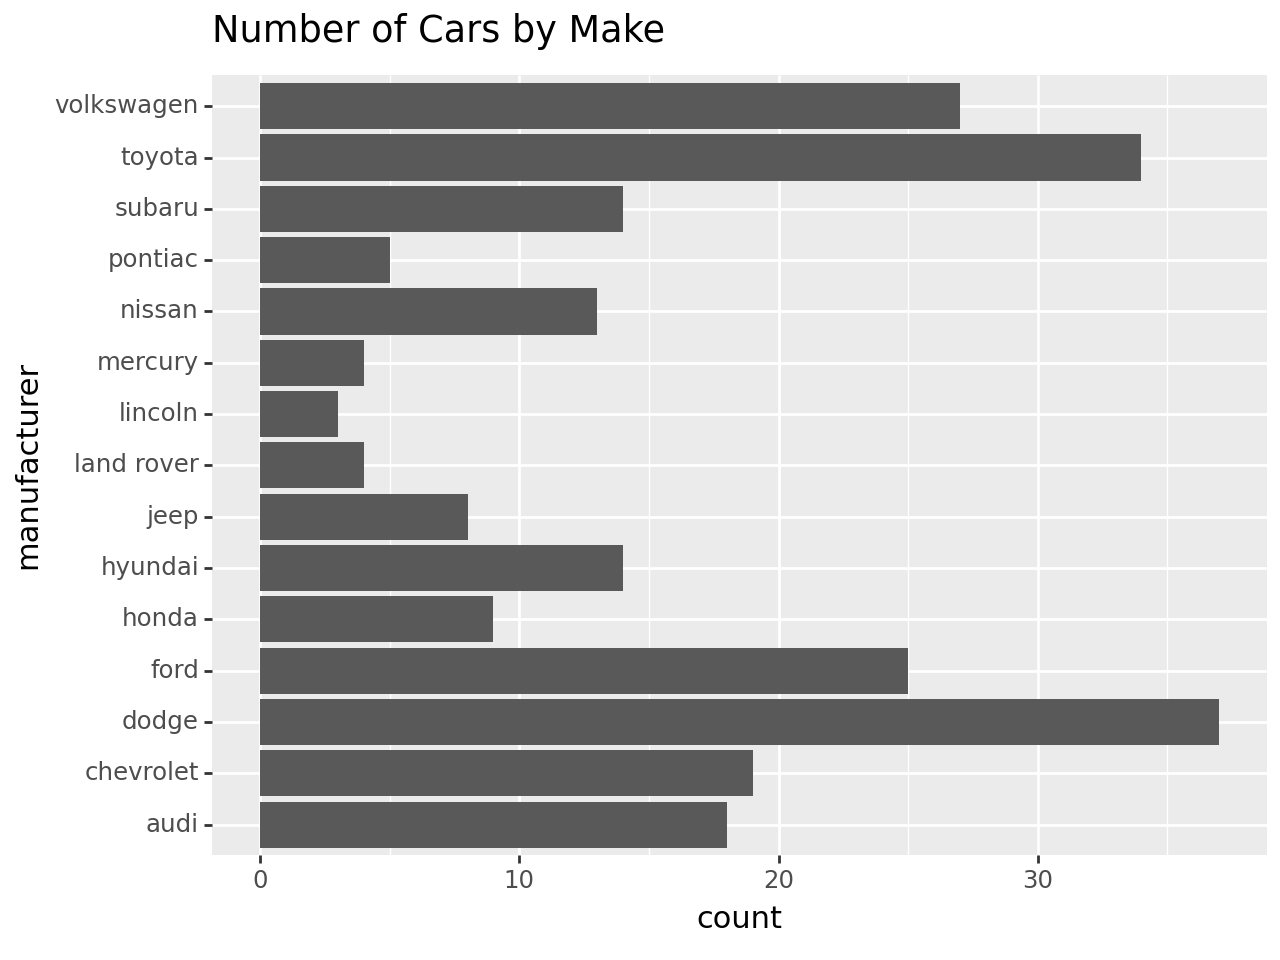

<Figure Size: (640 x 480)>

In [8]:
#BAR Chart with Plotnine
(ggplot(mpg) + 
   aes(x='manufacturer') +
   geom_bar(size=20) + 
   coord_flip() +
   ggtitle('Number of Cars by Make')
)

# Histogram

In [9]:
#Histogram with Altair
(
    alt.Chart(mpg)
    .mark_bar()
    .encode(
        alt.X('cty', bin=alt.Bin(step=2)),
        y='count()',
    )
)

alt.Chart(...)

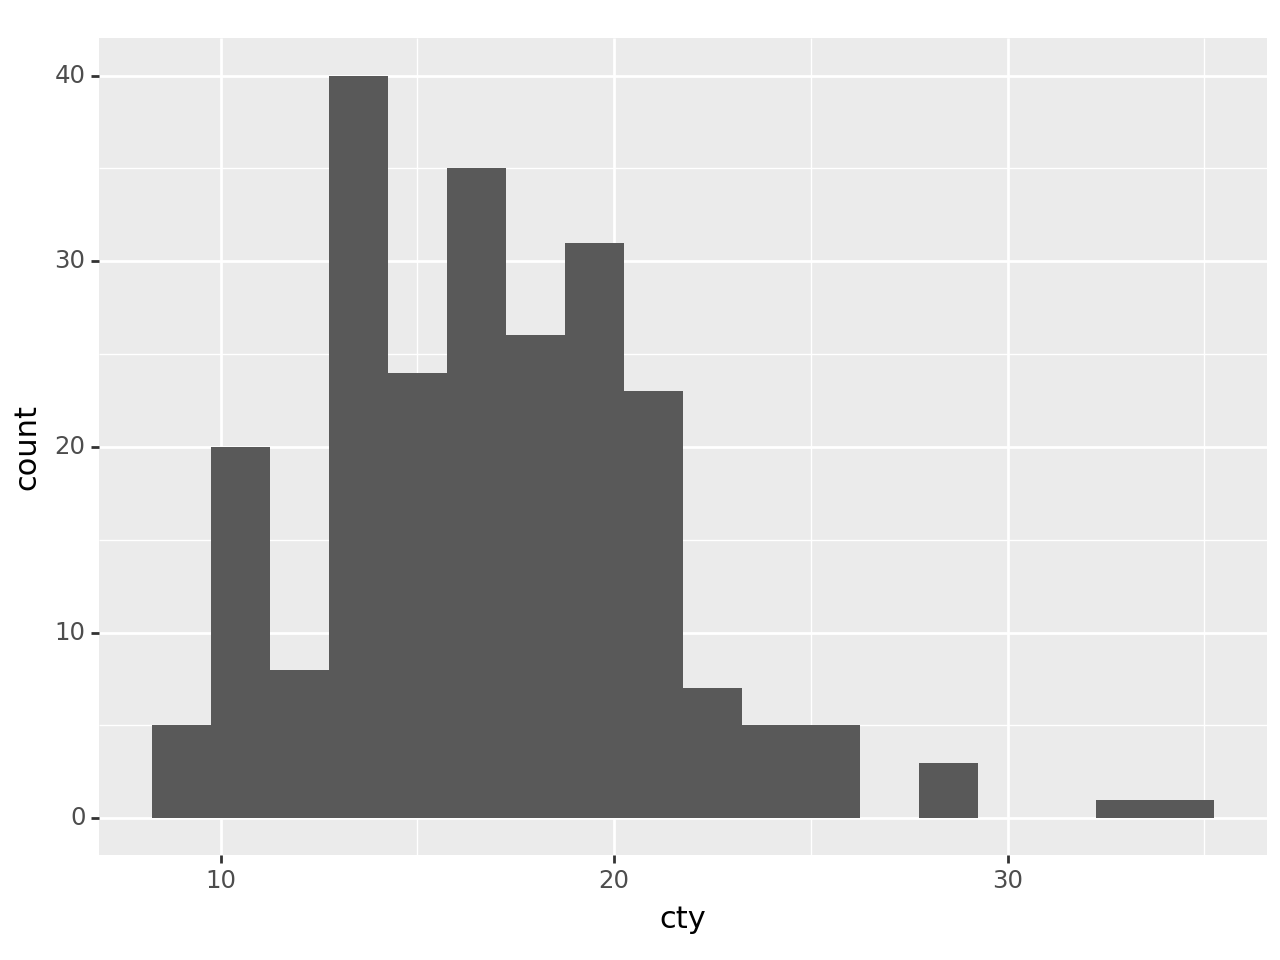

<Figure Size: (640 x 480)>

In [10]:
#Histogram with Plotnine
(ggplot(mpg) + 
    aes(x='cty') +
    geom_histogram(binwidth=1.5))

# Scatter Plot

In [11]:
#Scatter plot with Altair
alt.Chart(mpg).mark_circle().encode(
    alt.X(
        'displ',
        title='Engine Displacement in Liters',
    ),
    alt.Y(
        'hwy',
        title='Highway Miles per Gallon',
    ),
).properties(
    title='Engine Displacement in Liters vs Highway MPG'
)

alt.Chart(...)

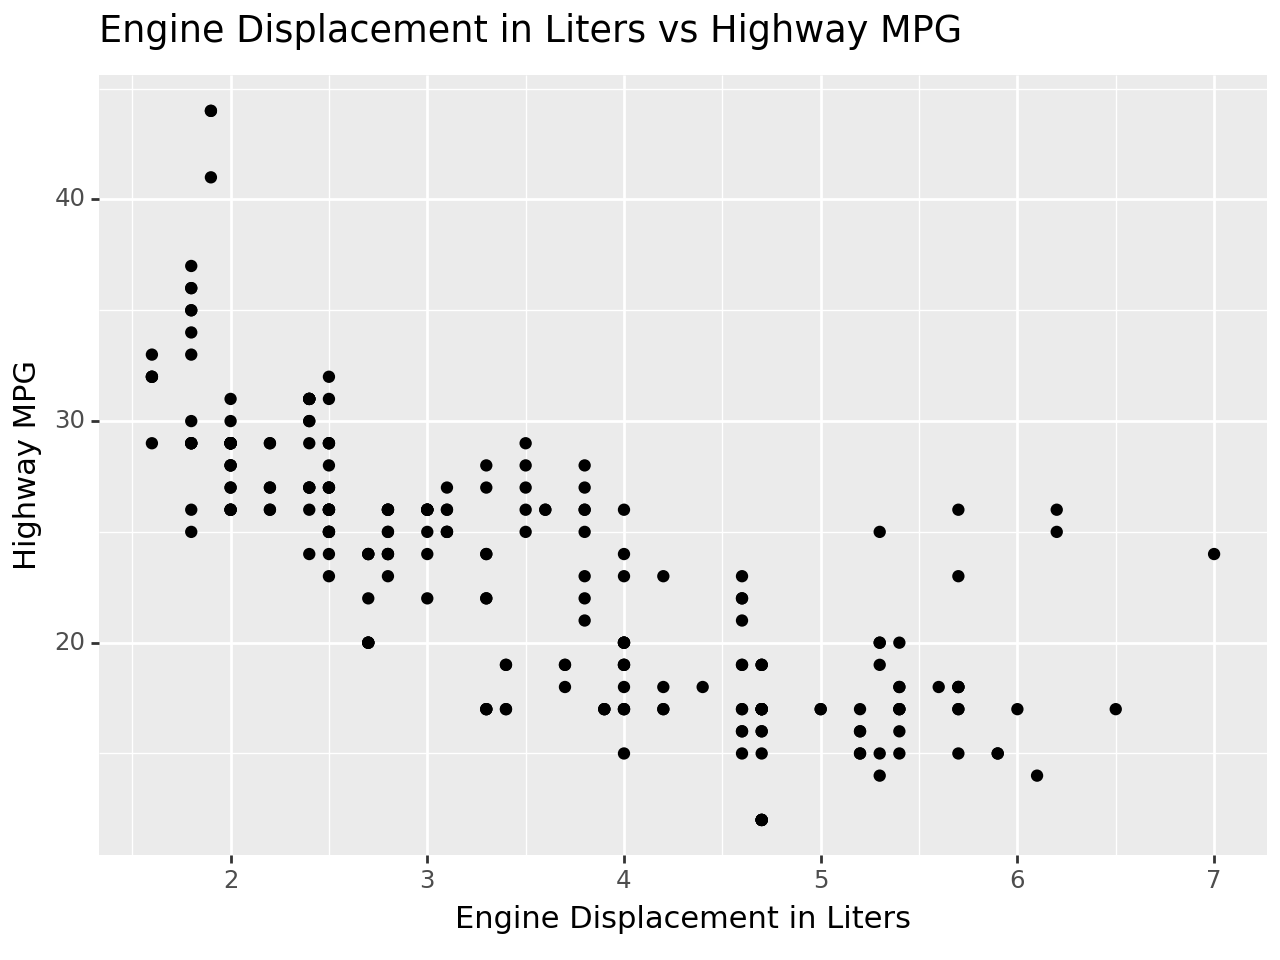

<Figure Size: (640 x 480)>

In [12]:
#Scatter Plot with Plotnine
(ggplot(mpg) +
    aes(x = 'displ', y = 'hwy') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

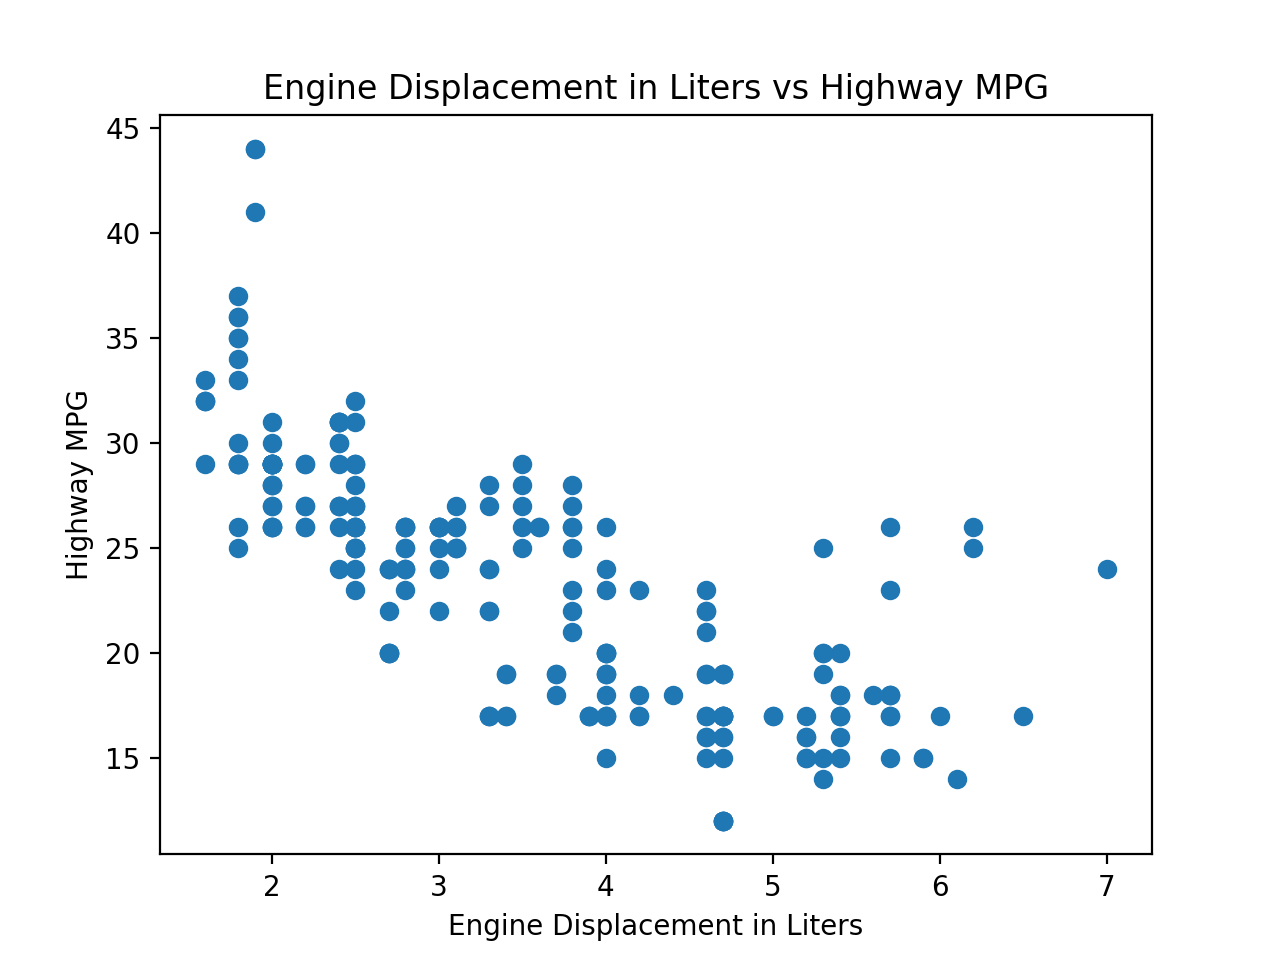

In [13]:
#Scatter Plot with Matplotlib
import matplotlib.pyplot as plt
plt.scatter(mpg['displ'], mpg['hwy'])
plt.title('Engine Displacement in Liters vs Highway MPG')
plt.xlabel('Engine Displacement in Liters')
plt.ylabel('Highway MPG')
plt.show()

# Scatter Plot
(Faceted with colour)

In [14]:
#Scatter Plot(colour) with Altair
(
    alt.Chart(
        mpg,
        title='Engine Displacement in Liters vs Highway MPG',
    )
    .mark_circle()
    .encode(
        alt.X(
            'displ',
            title='Engine Displacament in Liters',
        ),
        alt.Y('hwy', title='Highway MPG'),
        color='class',
    )
)

alt.Chart(...)

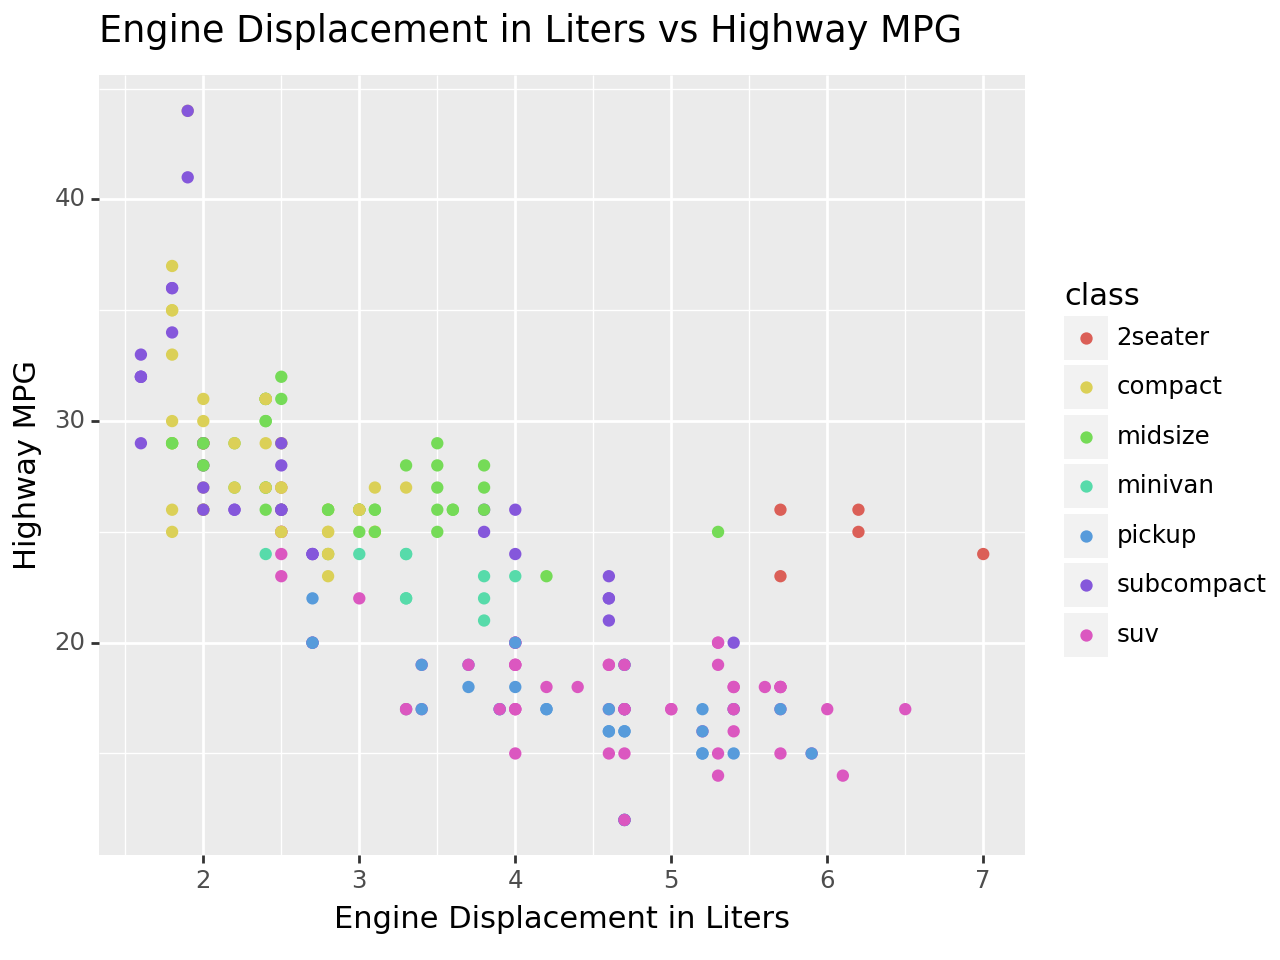

<Figure Size: (640 x 480)>

In [15]:
#Scatter Plot (Color) with Plotnine
(ggplot(mpg) + 
    aes(x = 'displ', y = 'hwy', color = 'class') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

# Scatter Plot with Points 
(Points Sized by Continuous Value)

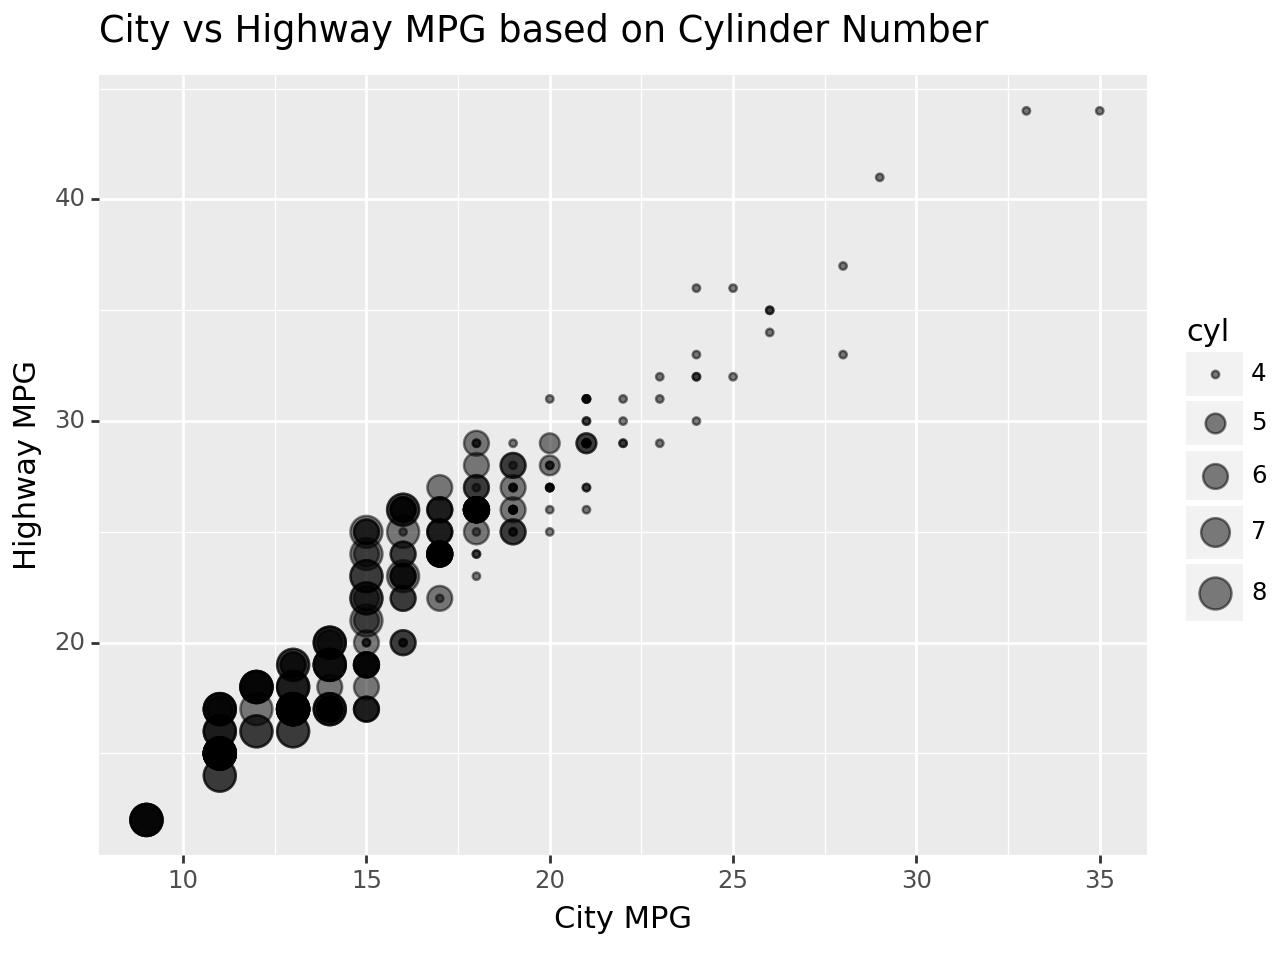

<Figure Size: (640 x 480)>

In [16]:
#Scatter Plot (continuous value) with Plotnine
(ggplot(mpg) + 
 aes(x='cty', y='hwy', size='cyl') + 
 geom_point(alpha=.5) + 
 ggtitle('City vs Highway MPG based on Cylinder Number') + 
 xlab('City MPG') + 
 ylab('Highway MPG')
)

In [17]:
#Scatter Plot (continuous value) with Altair
chart = alt.Chart(mpg).mark_point(size=60, opacity=0.7)  # Adjust size and opacity as needed

chart = chart.encode(
    x=alt.X('cty', title='City MPG'),
    y=alt.Y('hwy', title='Highway MPG'),
    color=alt.Color('cyl', title='Cylinder Number'),  # Adjust color if needed
    tooltip=[alt.Tooltip('cty', title='City MPG'), alt.Tooltip('hwy', title='Highway MPG')]  # Add tooltips
)

chart = chart.properties(
    title='City vs Highway MPG based on Cylinder Number',  # Adjust title if needed
)

chart

alt.Chart(...)

# Scatter Plot Faceted on One/Two Variable

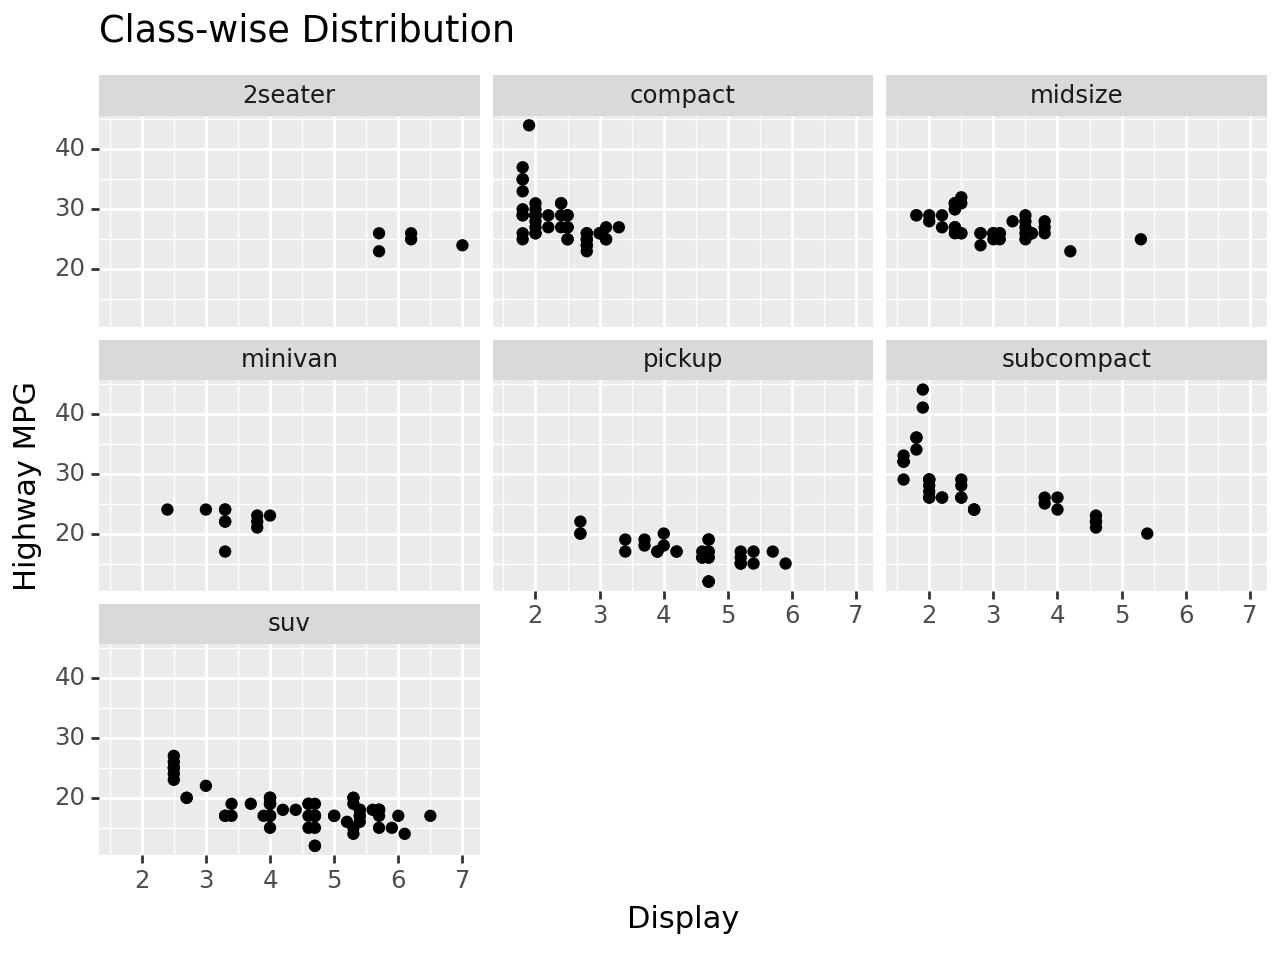

<Figure Size: (640 x 480)>

In [18]:
#Scatter Plot Faceted on One Variable by Plotnine
(ggplot(mpg.assign(c=mpg['class'])) + 
  aes(x='displ', y='hwy') +
  geom_point() +
  facet_wrap(' ~ c', nrow = 3)+
  ggtitle('Class-wise Distribution') + 
  xlab('Display') + 
  ylab('Highway MPG')
)

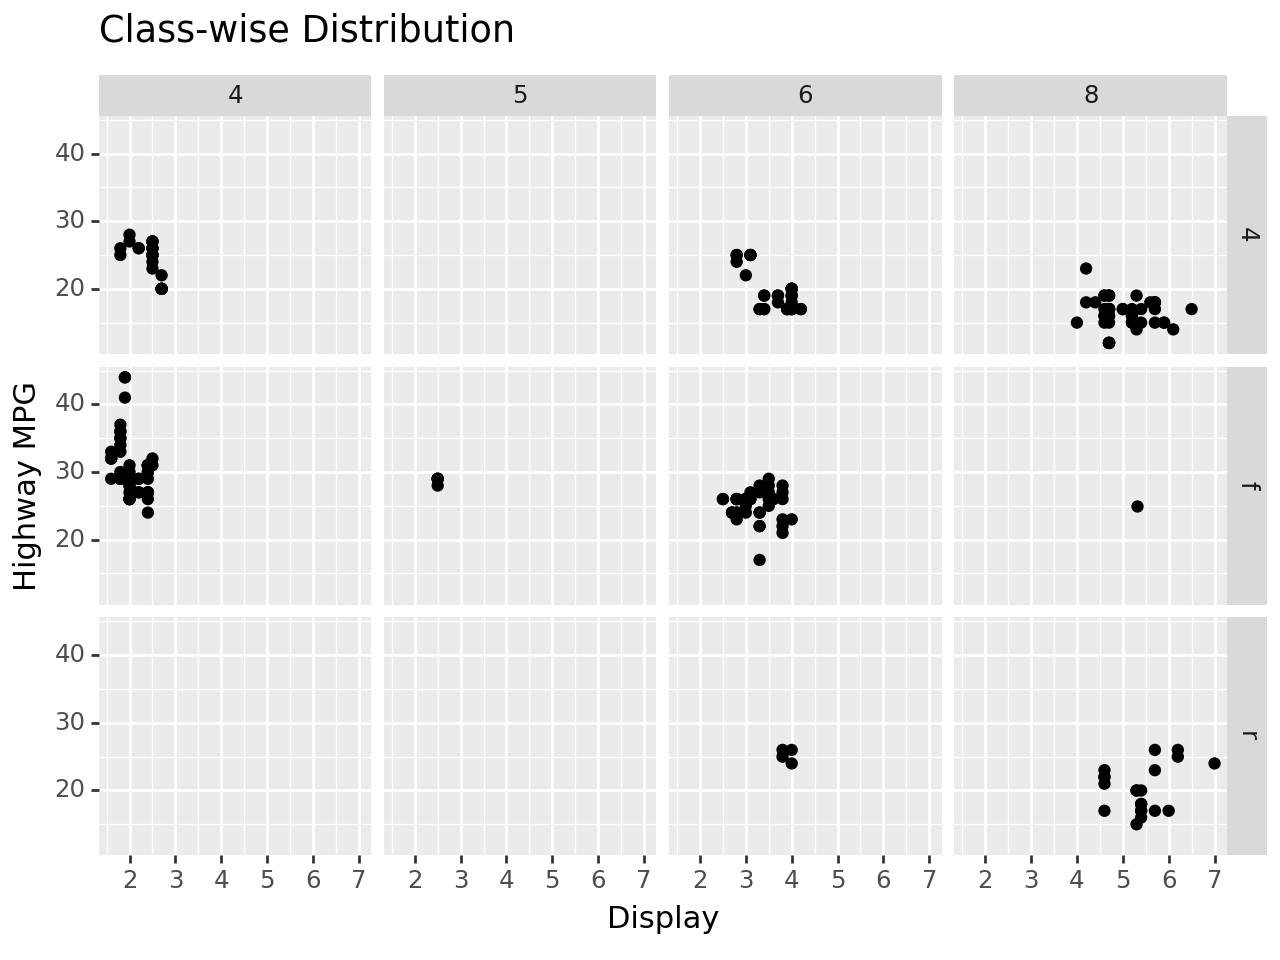

<Figure Size: (640 x 480)>

In [19]:
#Scatter Plot Faceted on Two Variable by Plotnine
(ggplot(mpg) + 
  aes(x='displ', y='hwy') +
  geom_point() +
  facet_grid('drv ~ cyl') +
  ggtitle('Class-wise Distribution') + 
  xlab('Display') + 
  ylab('Highway MPG')
)

In [20]:
#Scatter Plot Faceted on Two Variable by Altair
(alt
 .Chart(mpg)
 .mark_circle()
 .encode(x='displ', y='hwy',)
 .properties(
    width=100, height=150
  )
 .facet(column='cyl', row='drv')
)

alt.FacetChart(...)

# Scatter Plot and Regression Line with 95% CI Layered

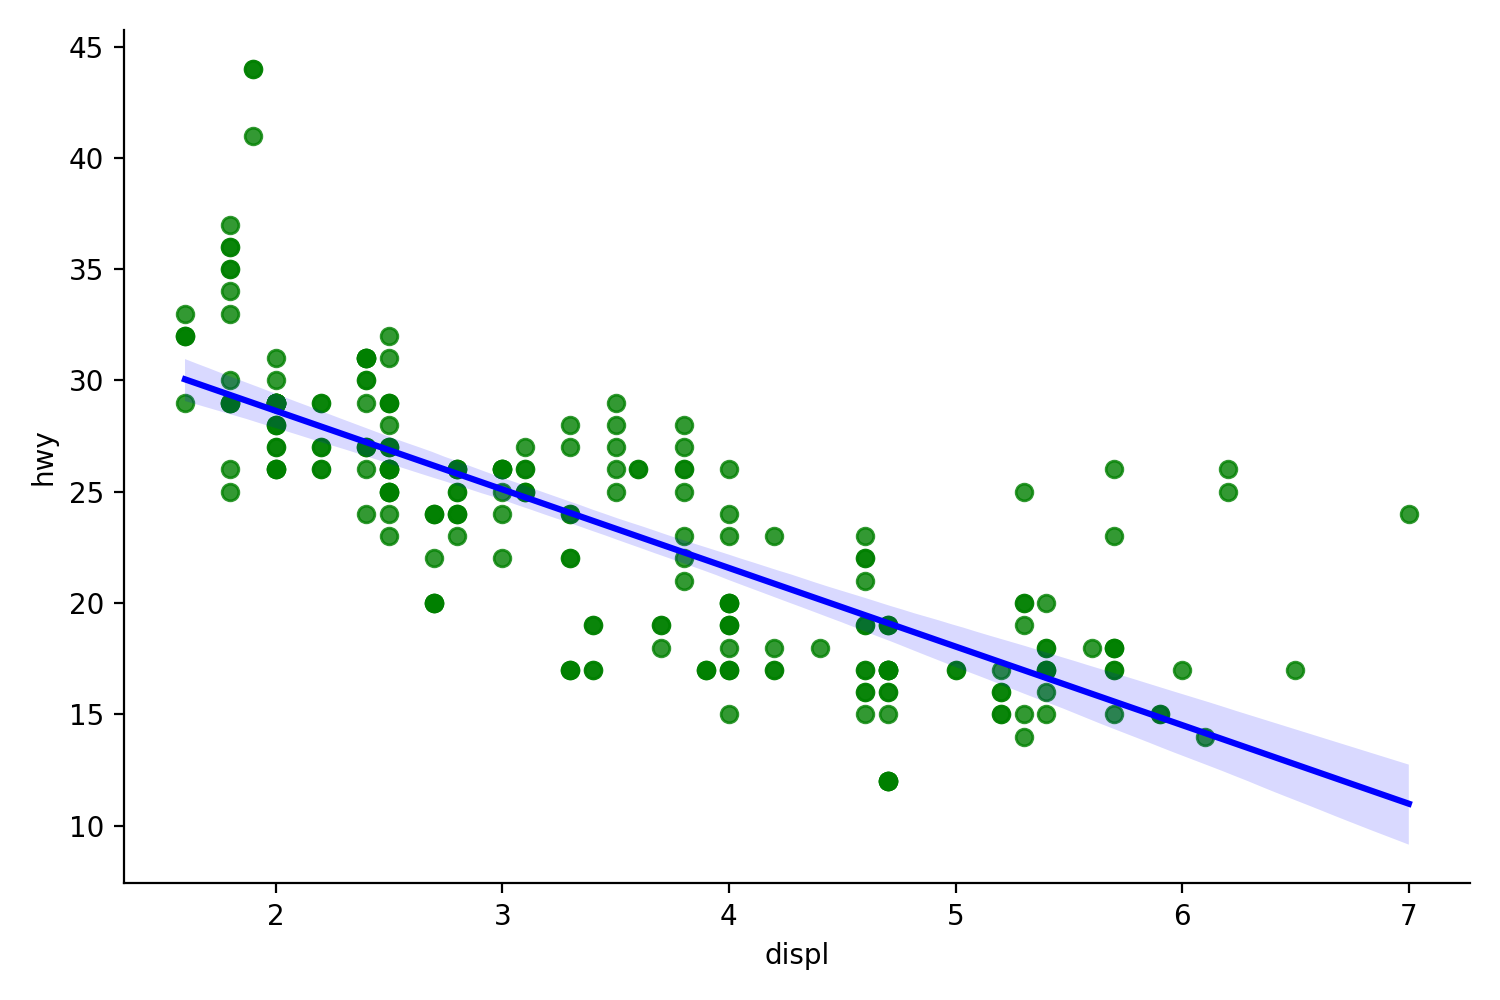

In [21]:
#Plotting with Seaborn
sns.lmplot(x='displ', y='hwy',data=mpg, 
           height=5, 
           aspect=1.5, 
           scatter_kws={"color": "green"}, 
           line_kws={"color": "blue"}
          )

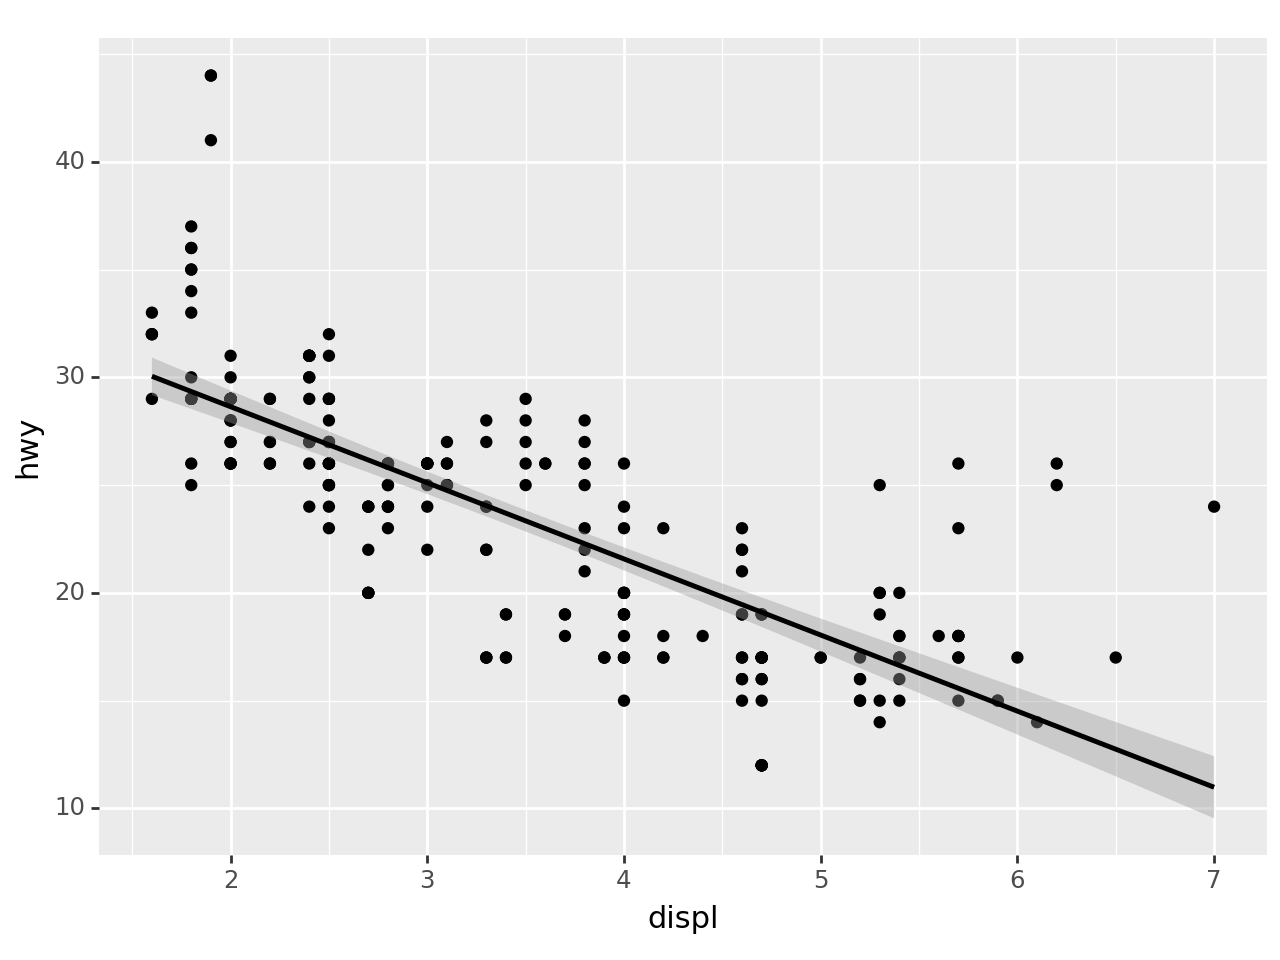

<Figure Size: (640 x 480)>

In [22]:
#plotting with Plotnine
(ggplot(mpg) +
    aes('displ', 'hwy') +
    geom_point() +
    geom_smooth(method='lm'))

# Smoothed Line Plot and Scatter Plot Layered

In [23]:
pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


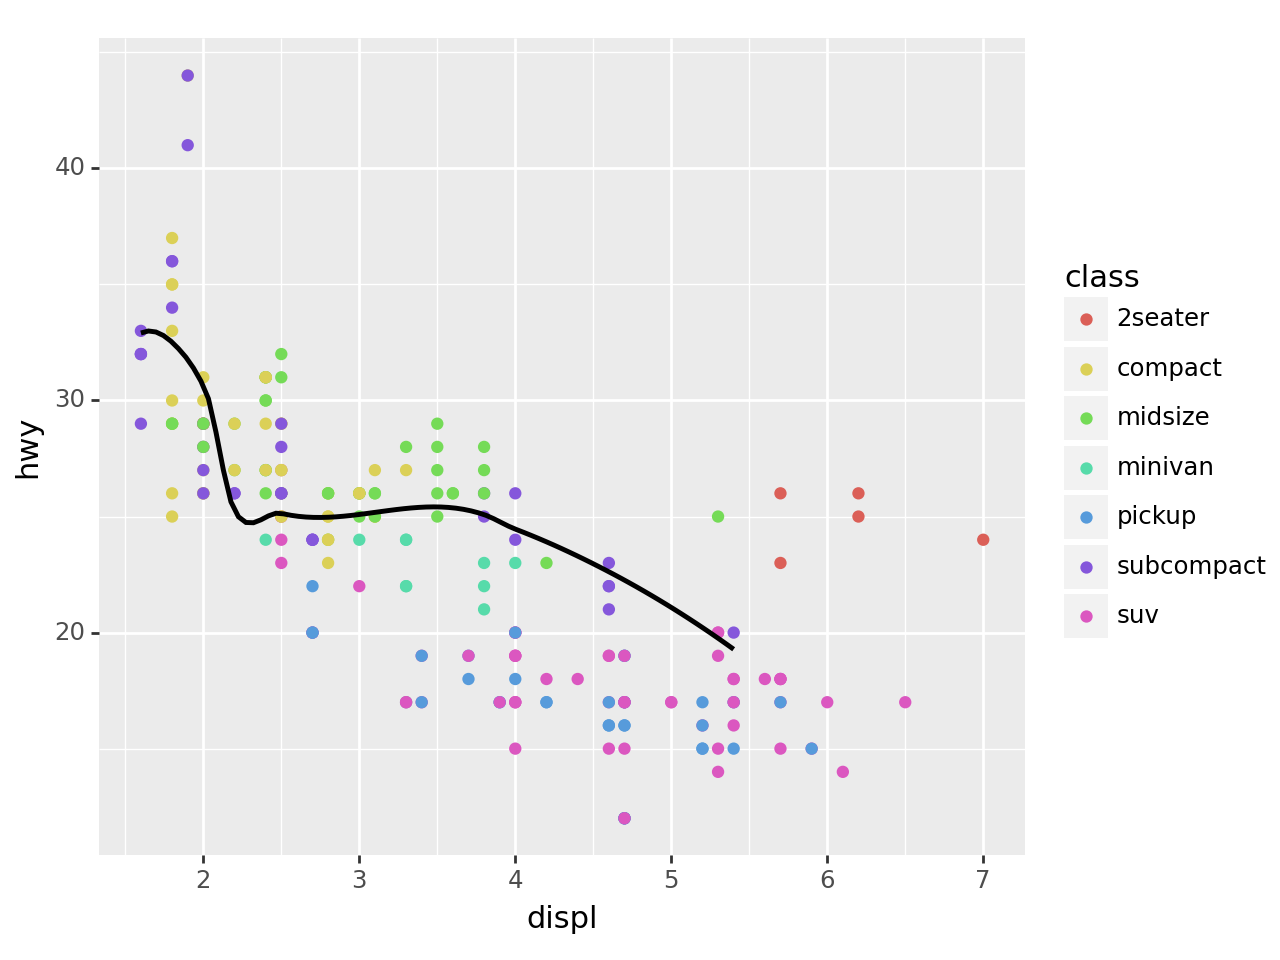

<Figure Size: (640 x 480)>

In [24]:
#Plotting with Plotnine
(ggplot(data=mpg, 
        mapping=aes(x='displ', y='hwy')) + 
        geom_point(mapping=aes(color = 'class')) + 
        geom_smooth(data=mpg[mpg['class'] == 'subcompact'], 
        se=False,
        method = 'loess'
        ))

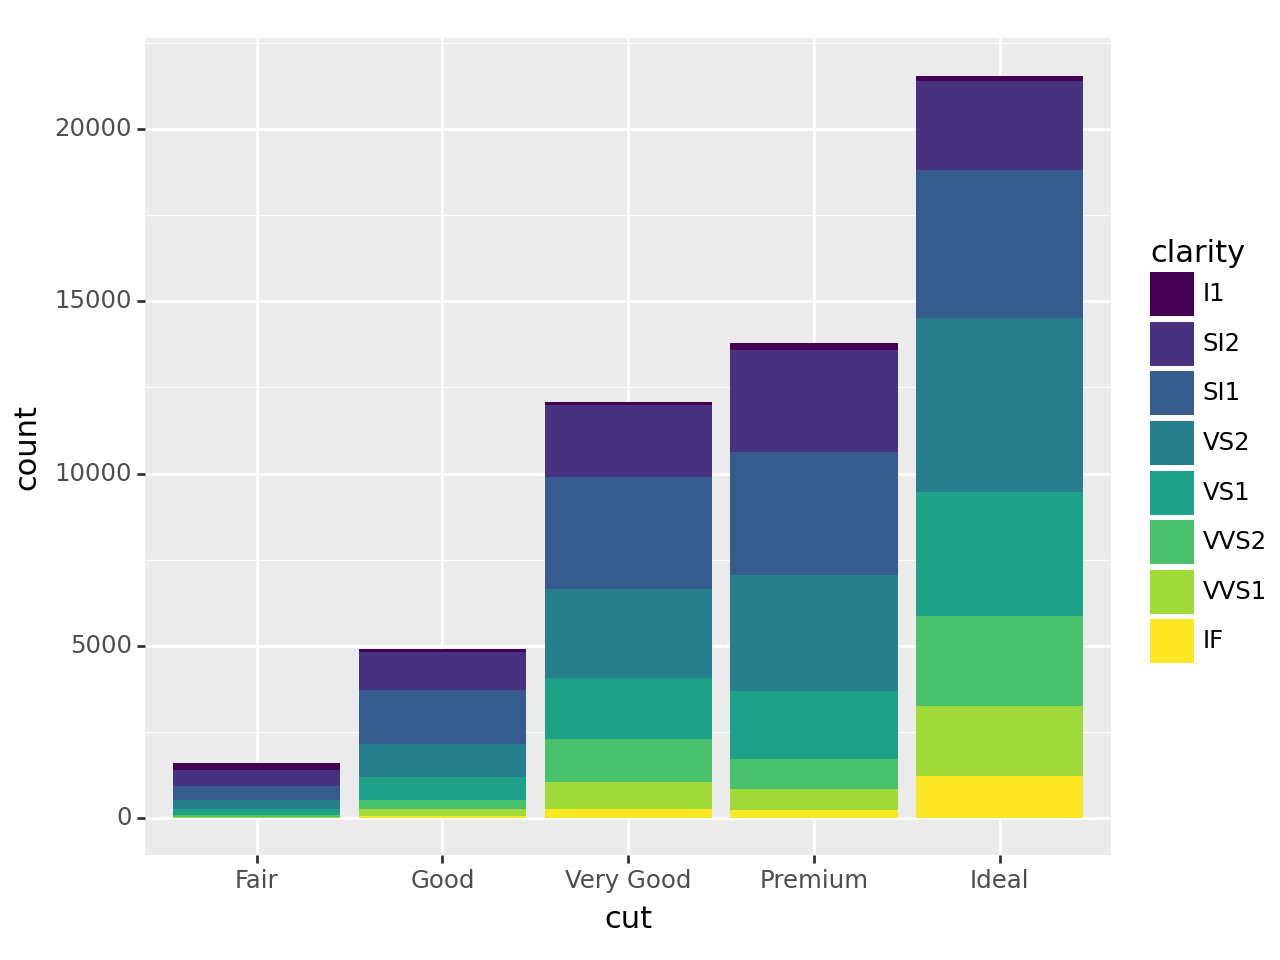

<Figure Size: (640 x 480)>

In [25]:
#Stacked Bar Chart with Plotnine
(ggplot(diamonds) + 
  aes(x='cut', fill='clarity') +
  geom_bar())

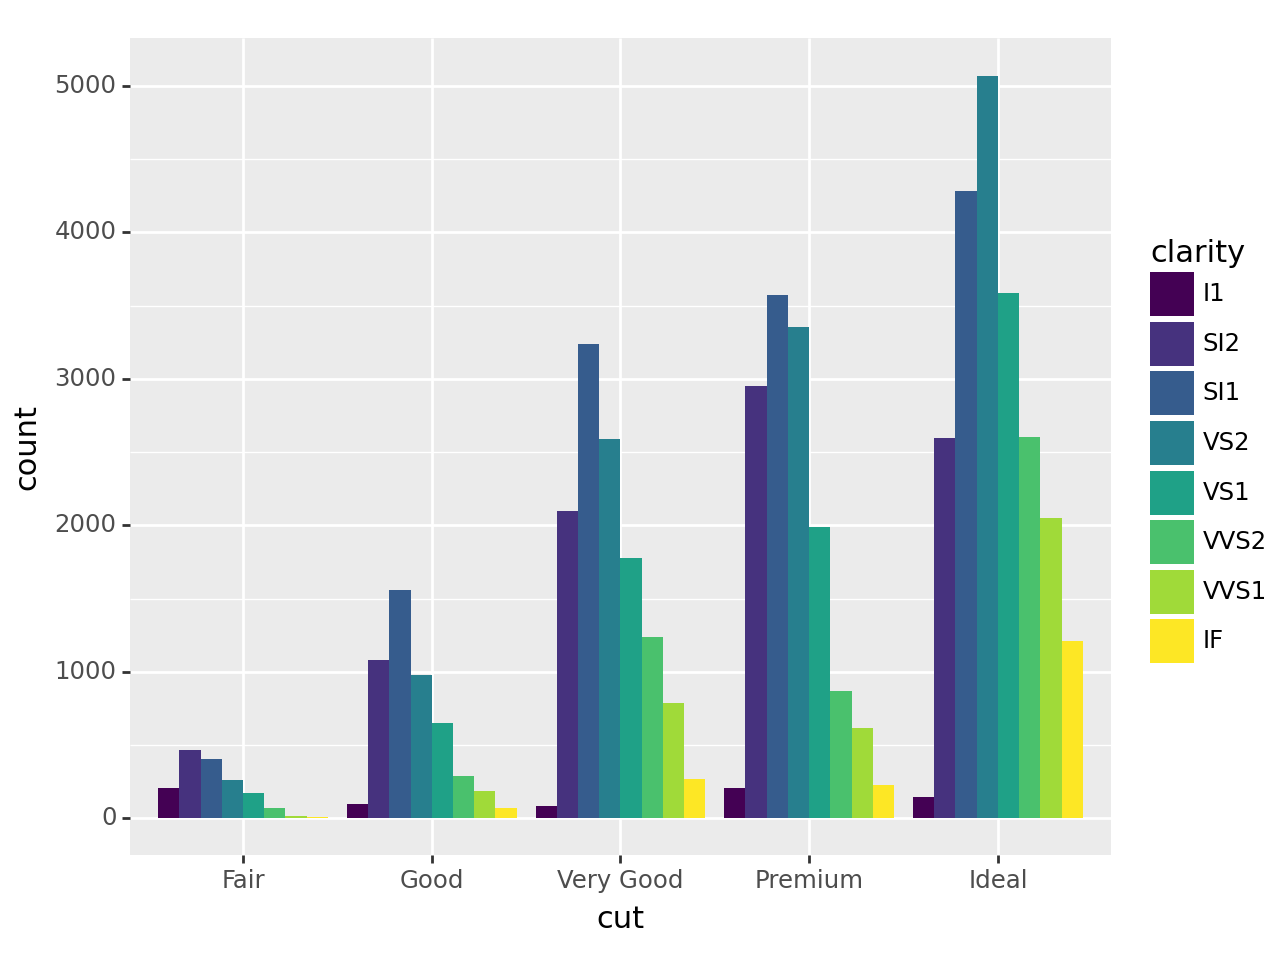

<Figure Size: (640 x 480)>

In [26]:
#Dodged Bar Chart with plotpine
(ggplot(diamonds) + 
  aes(x='cut', fill='clarity') +
  geom_bar(position = 'dodge'))

# Stacked KDE Plot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fil

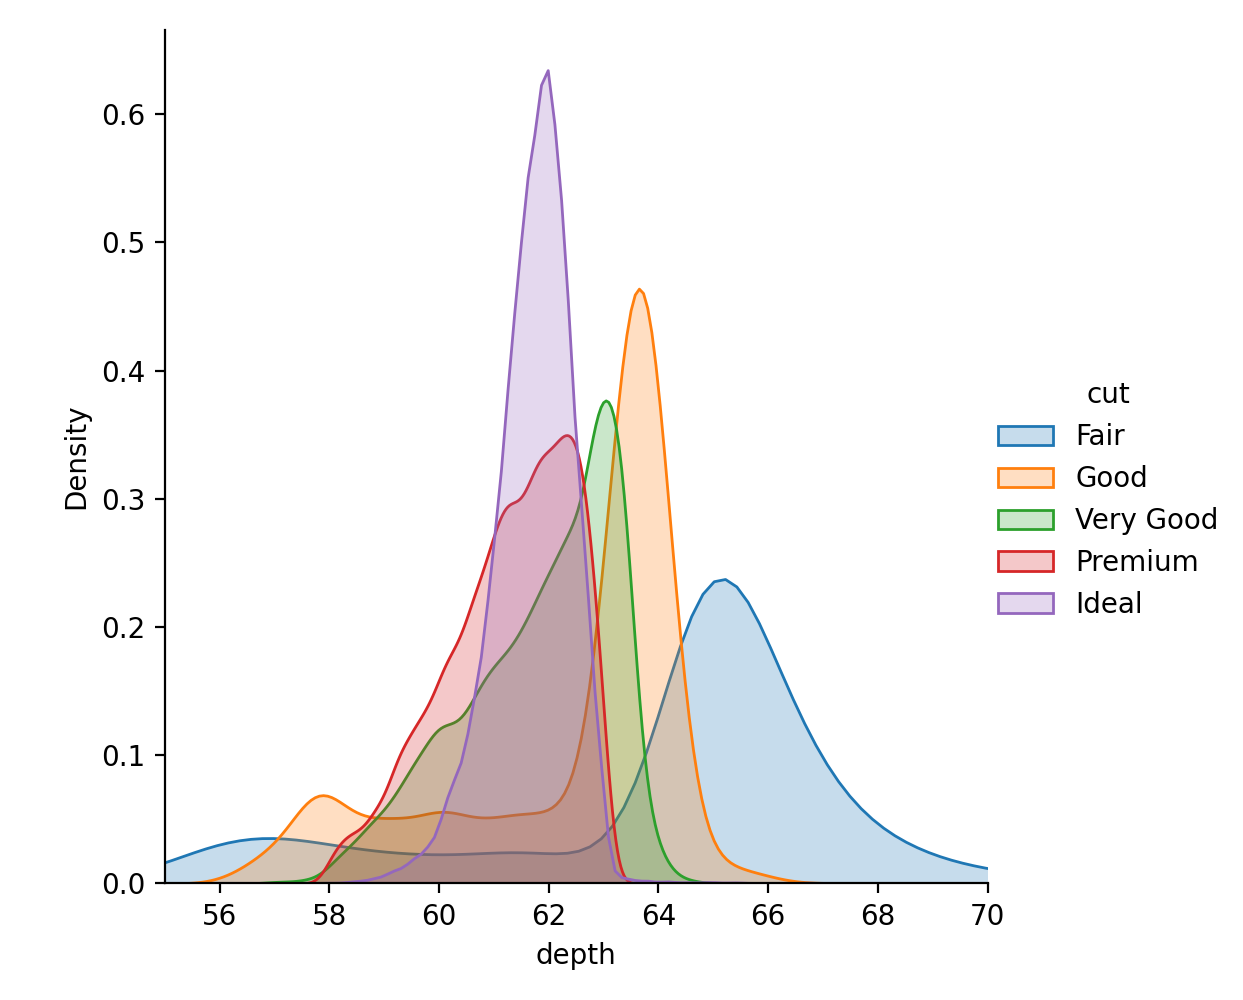

In [27]:
#Stack KDE Plot with Seaborn
(sns .FacetGrid(diamonds, hue='cut', height=5, xlim=(55, 70)) 
 .map(sns.kdeplot, 'depth', shade=True) 
 .add_legend()
)

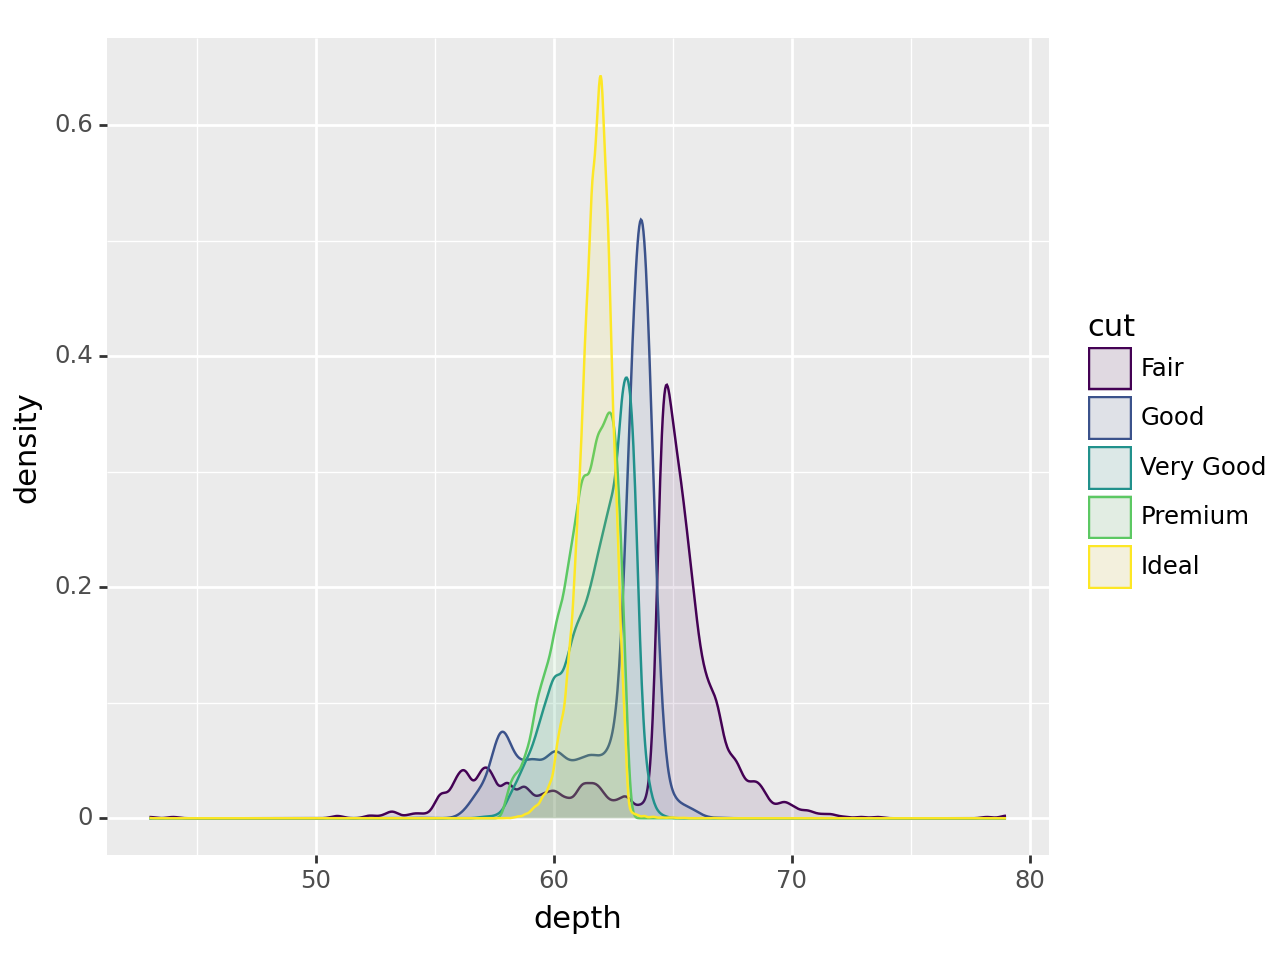

<Figure Size: (640 x 480)>

In [28]:
#Stack KDE Plot by Plotnine
(ggplot(diamonds) +
  aes('depth', fill='cut', color='cut') +
  geom_density(alpha=0.1))

#### 24 Feb 2024 : Additional charts will add later